# [로지스틱 회귀](https://)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

#[계단함수(unit step function)](https://)
- [임계값을 경계로 출력이 바뀌는 활성화 함수](https://)
>- 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수(t=0인 점에서 계단 모양의 함수)


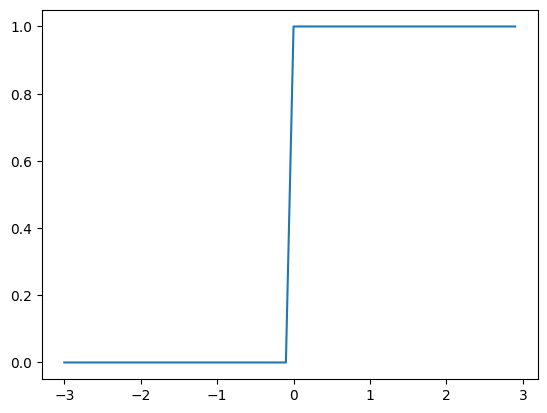

In [1]:
import numpy as np
import matplotlib.pylab as plt
t = np.arange(-3, 3, 0.1)
x = np.heaviside(t, 1)
plt.plot(t, x)
plt.show()



---



#[시그모이드 함수 ](https://)
- S자형 곡선 또는 시그모이드 곡선을 갖는 함수
>- 시그모이드 함수의 예시로는 로지스틱 함수가 있음

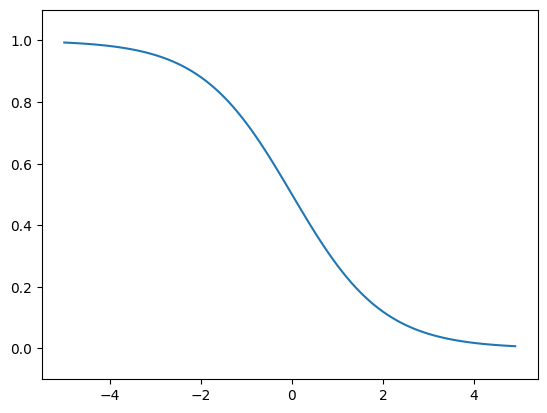

In [2]:
import numpy as ny
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(x))

x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()



---



#[소프트맥스 함수(SoftMax Function)](https://)
- input이 하나일 때 사용되는 시그모이드 함수를 [input이 여러 개일때도 사용할 수 있도록 일반화한 것](https://)
>- 세 개 이상으로 분류하는 [다중 클래스 분류에서 사용되는](https://) 활성화 함수
>- 소프트맥스 함수의 출력 값을 확률 분포의 일부로 해석 가능
>- 분류될 클래스가 n개라 할 때, n 차원의 벡터를 입력받아, 각 클래스에 속할 확률을 추정
>- 출력 값의 [총합이 1이 되는 특징을 ](https://)가진 활성화 함수

In [3]:
import numpy as np

def softmax(X):
    exp_a = np.exp(X)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [4]:
print(softmax([2, 3, 4])) # 확률 값

[0.09003057 0.24472847 0.66524096]


In [5]:
a=np.array([0.3, 2.9, 4.0])
exp_a=np.exp(a)
sum_exp_a=np.sum(exp_a)
y=exp_a/sum_exp_a
print(a)

[0.3 2.9 4. ]


In [6]:
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [7]:
print(sum_exp_a)

74.1221542101633


In [8]:
print(y)

[0.01821127 0.24519181 0.73659691]


In [9]:
print(sum(y))

1.0




---



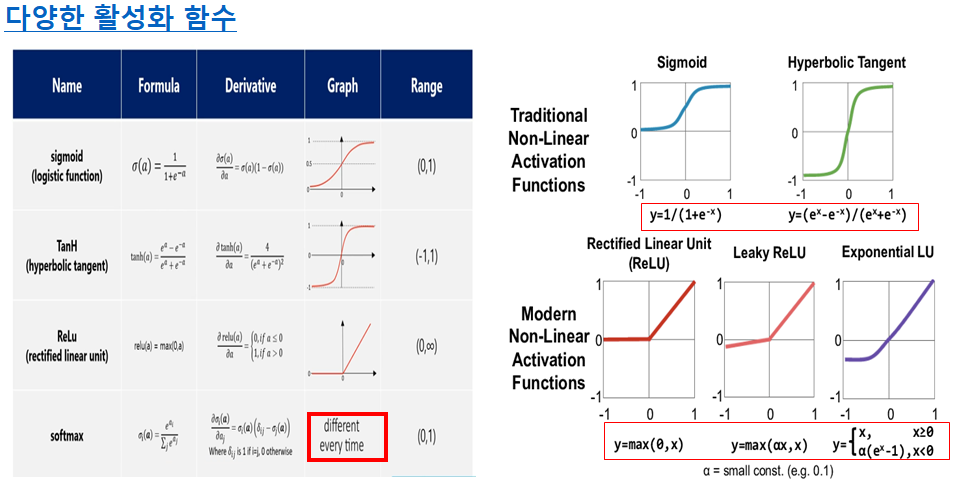



---



# [럭키백의 확률](https://)

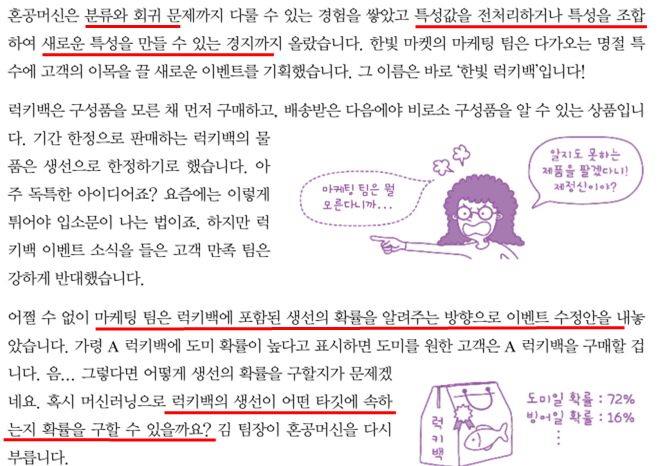



---



- 럭키백에 들어갈 수 있는 [생선은 7개](https://)
- 이 이벤트를 잘 마치려면 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 때 [7개 생선에 대한 확률을 출력해야 함](https://)

# [데이터 준비하기](https://)

In [10]:
#판다스의 read_csv() 함수로 CSV 파일을 데이터프레임으로 변환한 다음 head() 메서드로 처음 5개 행을 출력해 보기

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [11]:
print(len(fish))

159


In [12]:
#UNIQUE 함수는 목록 또는 범위에서 고유 값의 목록을 반환
#7종-[도미, 잉어, 뱅어, 메기, 농어, 강꼬치, 빙어]

print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [13]:
#데이터프레임에서 Species 열을 타깃으로 만듬
#나머지 5개 열은 입력 데이터로 사용
#데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환됨
#to_numpy() 메서드로 넘파이 배열로 바꾸어 fish_input에 저장

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [14]:
# 타깃 데이터를 만들기
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']




---



#[데이터를 훈련 세트와 테스트 세트로 나누기](https://)

In [45]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [16]:
print(train_input[:5])

[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]


In [17]:
print(train_target[:5])

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']




---



#[훈련 세트와 테스트 세트를 표준화 전처리하기](https://)

In [18]:
# 모델의 학습 성능을 높이기 위해서 해당 값들을 일정한 범위 의 값으로 스케일링 해줄 필요가 있음
# 표준 정규 분포 -  정규분포 중 평균이 0, 분산이 1인 정규분포를 의미
# 표준화 (standardization) - 입력된 x 들의 정규 분포를 평균이 0 이고 분산이 1인  표준 정규 분포로 변환한다는 것

#정규화 (normalization) - 입력된 x 값들을 모두 0과 1사이의 값으로 변환하는 방식

#StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리
#특성들의 평균을 0, 분산을 1로 스케일링, 특성들을 정규분포로 변환!!!!
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [19]:
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [20]:
print(test_scaled[:5])

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]




---



# [k-최근접 이웃 분류기의 확률 예측](https://)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [22]:
#훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있음
#타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류 class classification라고 부름
#다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있음
#사이킷런에서는 편리하게도 문자열로 된 타깃값을 그대로 사용할 수 있음
#이때 주의할 점이 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨짐
#KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있음

print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [23]:
#predict() 메서드는 타깃값으로 예측을 출력
#테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해보기

print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [24]:
#predict_ proba() 메서드로 클래스별 확률값을 반환
#테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해보기

import numpy as np
proba = kn.predict_proba(test_scaled[:5])

#round() 함수는 기본으로 소수점 첫째 자리에서 반올림을 함
#decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있음
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]




---



#[k-최근접 이웃 분류기의 확률 예측하기](https://)

In [25]:
#이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해보기
#네 번째 샘플(‘pike’)의 최근접 이웃의 클래스를 확인
#kneighbors() 메서드의 입력은 2차원 배열이어야 함 - 넘파이 배열의 슬라이싱 연산자를 사용
#슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어짐

distances, indexes = kn.kneighbors(test_scaled[3:4])
print("거리 =" , distances)
print("색인 = " , indexes)

거리 = [[0.20774583 0.24862983 0.33682411]]
색인 =  [[104 115 106]]


In [26]:
#이 샘플의 이웃은 다섯 번째 클래스인 ‘Roach’가 1개이고 세 번째 클래스인 ‘Perch’가 2개
#다섯 번째 클래스에 대한 확률은 1/3=0.3333, 세 번째 클래스에 대한 확률은 2/3=0.6667
#3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3만 나옴

distances, indexes = kn.kneighbors(test_scaled[0:1])
print(train_target[indexes])

[['Perch' 'Perch' 'Perch']]




---



#[로지스틱 회귀](https://)

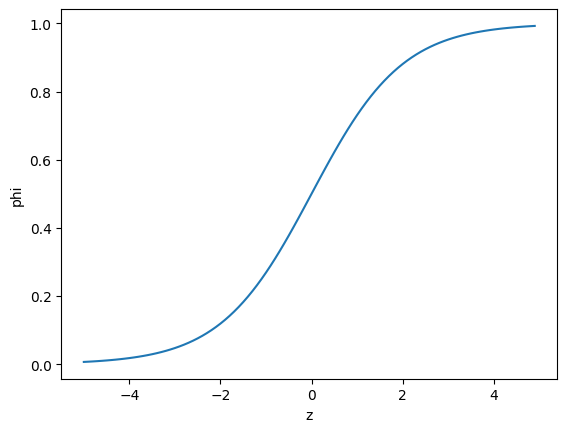

In [27]:
#z가 -∞일 때는 음수, ∞ 때는 양수, z=0일 때는 0.5
#z가 어떤 값이 되더라도 ø는 절대로 0~1 사이의 범위를 벗어나지 못함
#0~1 사이 값을 0~100%까지 확률로 해석할 수 있음
#-5와 5 사이에 0.1 간격으로 배열 z를 만든 다음 z 위치마다 시그모이드 함수를 계산
#지수 함수 계산은 np.exp() 함수를 사용

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()



---



# [로지스틱 회귀로 이진 분류 수행하기](https://)

In [28]:
#도미와 빙어 2개를 사용해서 이진 분류를 수행
#정확히 0.5일 때 라이브러리마다 다를 수 있음
#사이킷런은 0.5일 때 음성 클래스로 판단함
#불리언 인덱싱(boolean indexing)을 통해 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있음

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [29]:
#훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내기

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_bream_smelt[1])
print(target_bream_smelt[1])

[-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
Smelt




---



#[LogisticRegression 클래스를 이용하여 로지스틱 회귀 모델을 훈련해보기](https://)

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [31]:
#train_bream_smelt에 있는 처음 5개 샘플을 예측

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']




---



#[Bream과 Smelt 중에 어떤 것이 양성 클래스일까요?](https://)

In [32]:
#Bream과 Smelt 중에 어떤 것이 양성 클래스일까요?

#train_bream_smelt에서 처음 5개 샘플의 예측 확률을 출력
#첫 번째 열이 음성 클래스(0=Bream),두 번째 열이 양성 클래스(1=Smelt)에 대한 확률

print(lr.predict_proba(train_bream_smelt[:5])) #두번째 샘플만 양성 클래스인 빙어의 확률이 높음

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [33]:
print(lr.classes_)

['Bream' 'Smelt']




---



#[로지스틱 회귀가 학습 한 계수를 확인해보기](https://)
- [z = -0.404 × (Weight) - 0.576 × (Length) - 0.663 × (Diagonal) - 1.013 × (Height) -0.732 × (Width) - 2.161](https://)


In [34]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]




---



#[train_bream_smelt의 처음 5개 샘플의 z값을 출력해보기](https://)

In [35]:
#decision_ function() 메서드는 양성 클래스에 대한 z값을 반환
#z = -0.404 × (Weight) - 0.576 × (Length) - 0.663 × (Diagonal) - 1.013 × (Height) -0.732 × (Width) - 2.161

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]




---



#[decisions 배열의 값을 시그모이드 함수를 이용하여 확률값 구하기](https://)

In [36]:
#시그모이드 함수 expit()를 이용
#predict_proba() 메서드 출력의 두 번째 열의 값과 동일
#SciPy라이브러리에서 expit이라는 sigmoid 함수를 가져와서 Python 시그모이드 함수의 SciPy버전을 사용할 수도 있음

from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]




---



# [로지스틱 회귀로 다중 분류 수행하기](https://)

In [37]:
#충분하게 훈련시키기 위해 반복 횟수를 1,000으로 증가
#기본적으로 릿지 회귀와 같이 계수의 제곱을 규제 - L2 규제라고도 부름

#릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절함 - alpha가 커지면 규제도 커짐

#규제를 제어하는 매개변수는 C - C는 alpha와 반대로 작을수록 규제가 커짐
#C의 기본값은 1임 - 규제를 조금 완화하기 위해 20으로 늘림

#lr은 학습률 - 현재점에서 다음점으로 얼만큼 이동할지, 다르게 말하면 모델이 얼마나 세세하게 학습을 할지를 말함

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925




---



#[테스트 세트의 처음 5개 샘플에 대한 예측을 출력해보기 ](https://)

In [38]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']




---



#[테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해보기 ](https://)

In [39]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [40]:
#classes_ 속성 정보 알아보기
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']




---



#[coef_와 intercept_의 크기를 출력해보기](https://)

In [41]:
#5개의 특성을 사용하므로 coef_ 배열의 열은 5개임
#즉, 클래스에 대응하는 계수 백터 7개를 가지고 있으며
#열은 각 특성에 따른 계수 값을 5개를 가짐
#intercept_(각 클래스의 절편을 담은 1차원 백터)도 7개는 이진 분류에서 보았던
#z를 7개나 계산한다는 의미임

print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)




---



#[5개 샘플에 대한 z1~z7의 값을 구해보기 9.86](https://)

In [42]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [43]:
#decision 배열을 softmax() 함수에 전달(다중 분류 시 predict_proba에서 확률 계산은 소프트맥스 함수로 계산함)
#softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정
#axis=1로 지정하여 각 행, 즉 각 샘플에 대해 소프트맥스를 계산
#axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산

from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
